# Introduction
뇌동매매로 깡통 차는 것만큼은 반드시 피해야 한다.  
유튜브: https://youtu.be/nMChOdDAD0c

# Import

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [87]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,매매횟수
0,2022-03-29,고려시멘트,5230,09:09:07,09:21:27,2.87,1
1,2022-03-29,고려시멘트,5410,09:28:09,09:32:19,1.85,2
2,2022-03-29,영진약품,5490,09:51:11,09:55:24,0.66,3
3,2022-03-29,버킷스튜디오,5060,09:58:16,09:59:56,-0.59,4
4,2022-03-29,우리바이오,4390,10:00:40,10:00:50,-0.57,5


In [88]:
df['수익률'] = df['수익률'].apply(lambda x : x - 0.3)

# Visualization
01 : Best of Best  
01~05: Best한 구간(수익 구간)  
05~12: 미지의 구간(보수적으로 손실구간이라 가정)  
12~17: 경고 구간  
17~  : 위험 구간

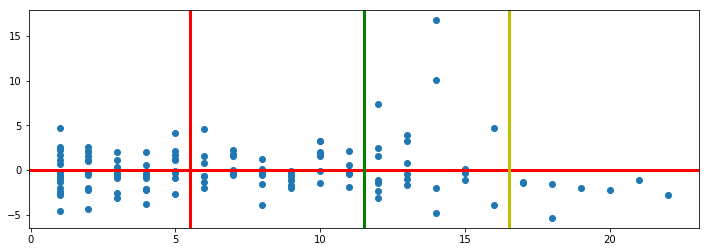

In [90]:
plt.scatter(df.매매횟수, df.수익률)
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=5.5, color='r', linewidth=3)
plt.axvline(x=11.5, color='g', linewidth=3)
plt.axvline(x=16.5, color='y', linewidth=3)
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# 절대 넘어가면 안 되는 매매횟수
5회

In [91]:
list = []
dates = df['주문일자'].unique()
for date in dates:
    frame = df[df['주문일자'] == date]
    count = len(frame)
    mean = round(frame['수익률'].mean(),2)
    median = round(frame['수익률'].median(),2)
    list.append([count, mean, median])

df = pd.DataFrame(list, columns=['count','mean','median'])
df = df.sort_values('count', ascending=True)
df = df.reset_index(drop=True)
df = df.set_index('count')
df

,mean,median
count,,
1,4.65,4.65
1,1.65,1.65
1,2.20,2.20
1,1.16,1.16
2,0.07,0.07
3,0.62,0.63
3,0.18,0.11
5,0.56,0.62
5,0.25,0.07


# Conclusion
5회까지 수익이다. 따라서 최대 5회까지 매매한다.  